# Part II: What amenities do AirBnB guests want?

AirBnB guests expect more of a personalised experience than they would staying at a hotel. There are so many reasons someone would choose one AirBnB over another. A family on holiday want a kid friendly place with a pool. Someone on a business trip would look for a place with a laptop friendly workspace and good internet.  

But how do I decide which amenities will make the most impact for my AirBnB? Which amenities are non-negotiable for guests, and which are nice-to-haves? How do I differentiate my AirBnB from the rest so that I can get bookings and make money?

# Step 1: Gather

To answer these questions I will be using the 'listings.csv' dataset. 

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import listings.csv 
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# Step 2: Assess

I want to look at the amenities that each of the listings are advertising so that I can determine which are essential for my AirBnB and also  identify where there are gaps in the market - potential differentiators. 

I will focus on the AirBnBs that are making the most money - because they are obviously doing something right. There is no revenue column in the dataset but I can use the 'price' and 'availability_365' columns to estimate each listing's revenue for the year. 

In [3]:
#View colunmns of interest
df_listings[['amenities', 'price', 'availability_365']].head()

,amenities,price,availability_365
0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,346
1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,291
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,220
3,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,143
4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,365


In [4]:
#Take a look at the amenities of the current listings
df_amenities = df_listings['amenities'].value_counts().reset_index()
df_amenities.head()

,index,amenities
0,{},45
1,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",11
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po...",10
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",8
4,"{TV,Internet,""Wireless Internet"",""Air Conditio...",7


Some data wrangling and cleaning is required to get the 'price' and 'amenities' columns into a useable format. 

# Step 3: Clean

In [5]:
# Convert 'price' to float
df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_2353/1858732969.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")


In [6]:
# The items are grouped together if the listing contains more than one amenity. 
# We need to clean this up by splitting the list items into rows
df_listings['amenities'] = df_listings['amenities'].str.replace('"', '')
df_listings['amenities'] = df_listings['amenities'].str.replace('{', '')
df_listings['amenities'] = df_listings['amenities'].str.replace('}', '')

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_2353/394202549.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['amenities'] = df_listings['amenities'].str.replace('{', '')
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_2353/394202549.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['amenities'] = df_listings['amenities'].str.replace('}', '')


In [7]:
df_listings[['amenities', 'price', 'availability_365']].head()

,amenities,price,availability_365
0,"TV,Cable TV,Internet,Wireless Internet,Air Con...",85.0,346
1,"TV,Internet,Wireless Internet,Kitchen,Free Par...",150.0,291
2,"TV,Cable TV,Internet,Wireless Internet,Air Con...",975.0,220
3,"Internet,Wireless Internet,Kitchen,Indoor Fire...",100.0,143
4,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",450.0,365


# Step 4: Analyze

I would like to see how many listings have each of the amenities to see which are the most popular and essential to the market

In [8]:
# Function to get total count of a column with lists

def count_amenities(df, col):
    
    count_rows = df.shape[0]
    
    new_df = df[col].value_counts().reset_index()
    new_df.rename(columns={'index': col, col: 'count'}, inplace=True)
    new_df[col] = new_df[col].str.split(",")
    new_df = new_df.explode(col).reset_index(drop=True)
    new_df = new_df.groupby([col]).sum()['count'].reset_index()
    new_df = new_df.sort_values('count', ascending=False)
    new_df['perc'] = round((new_df['count']/count_rows)*100,1)
    
    return new_df

In [9]:
# View top 10 amenities for all the listings

df_allListings = count_amenities(df_listings, 'amenities').reset_index(drop=True)
df_allListings.index.rename('Importance_All', inplace=True)
df_allListings.reset_index(drop=False, inplace=True)
df_allListings.head(10)

,Importance_All,amenities,count,perc
0,0,Wireless Internet,3667,96.0
1,1,Heating,3627,95.0
2,2,Kitchen,3423,89.7
3,3,Smoke Detector,3281,85.9
4,4,Essentials,3237,84.8
5,5,Dryer,2997,78.5
6,6,Washer,2992,78.4
7,7,Internet,2811,73.6
8,8,Shampoo,2670,69.9
9,9,TV,2574,67.4


I care more about the amenities that the top performing AirBnbs have, so I need a metric to compare how well the listings are doing.

In [10]:
# My new metric - Estimated income
df_listings['EstimatedIncome'] = df_listings['price'] * (365-df_listings['availability_365'])
df_listings['EstimatedIncome']

0         1615.0
1        11100.0
2       141375.0
3        22200.0
4            0.0
          ...   
3813    119547.0
3814      7268.0
3815     25761.0
3816     18414.0
3817     31146.0
Name: EstimatedIncome, Length: 3818, dtype: float64

Text(0.5, 0.98, 'Estimated Annual Income')

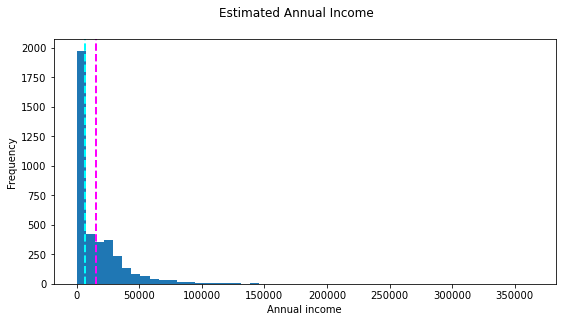

In [11]:
# Plot Annual Income
label = df_listings["EstimatedIncome"]
fig, ax = plt.subplots(1, 1, figsize = (9,4.5))

# Plot the histogram   
ax.hist(label, bins=50)
ax.set_ylabel('Frequency')
ax.set_xlabel('Annual income')

# Add lines for the mean, median, and mode
ax.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Add a title to the Figure
fig.suptitle('Estimated Annual Income')

In [12]:
df_listings["EstimatedIncome"].describe()

count      3818.000000
mean      15564.097957
std       22625.324377
min           0.000000
25%         476.250000
50%        6392.000000
75%       23622.500000
max      364635.000000
Name: EstimatedIncome, dtype: float64

In [13]:
# Filter out the 80th percentile of data - the top performers

df_topListings = df_listings[df_listings["EstimatedIncome"] > df_listings["EstimatedIncome"].quantile(0.8)]

In [14]:
# # View top 10 amenities for all the top performing listings

df_topListings = count_amenities(df_topListings, "amenities").reset_index(drop=True)
df_topListings.index.rename('Importance_Top', inplace=True)
df_topListings.reset_index(drop=False, inplace=True)
df_topListings.head(10)


,Importance_Top,amenities,count,perc
0,0,Wireless Internet,742,97.1
1,1,Kitchen,735,96.2
2,2,Heating,724,94.8
3,3,Smoke Detector,687,89.9
4,4,Essentials,670,87.7
5,5,Dryer,650,85.1
6,6,Washer,648,84.8
7,7,Internet,619,81.0
8,8,TV,605,79.2
9,9,Carbon Monoxide Detector,552,72.3


In [15]:
# Combine the allListings with topListings  

df_combined = pd.merge(df_allListings, df_topListings, on='amenities', how = 'inner')
df_combined['diff'] = df_combined['perc_y'] - df_combined['perc_x']
df_combined.sort_values('perc_y', ascending =False)
df_combined.head(10)

,Importance_All,amenities,count_x,perc_x,Importance_Top,count_y,perc_y,diff
0,0,Wireless Internet,3667,96.0,0,742,97.1,1.1
1,1,Heating,3627,95.0,2,724,94.8,-0.2
2,2,Kitchen,3423,89.7,1,735,96.2,6.5
3,3,Smoke Detector,3281,85.9,3,687,89.9,4.0
4,4,Essentials,3237,84.8,4,670,87.7,2.9
5,5,Dryer,2997,78.5,5,650,85.1,6.6
6,6,Washer,2992,78.4,6,648,84.8,6.4
7,7,Internet,2811,73.6,7,619,81.0,7.4
8,8,Shampoo,2670,69.9,10,541,70.8,0.9
9,9,TV,2574,67.4,8,605,79.2,11.8


# Step 5: Visualise

Lets compare what amenities the overall group vs. top performing listings consider the most important

In [16]:
show = df_combined[['amenities', 'perc_x', 'perc_y']].head(10)
show.rename(columns = {'perc_x': 'Overall', 'perc_y': 'Top performers'}, inplace=True)
show

,amenities,Overall,Top performers
0,Wireless Internet,96.0,97.1
1,Heating,95.0,94.8
2,Kitchen,89.7,96.2
3,Smoke Detector,85.9,89.9
4,Essentials,84.8,87.7
5,Dryer,78.5,85.1
6,Washer,78.4,84.8
7,Internet,73.6,81.0
8,Shampoo,69.9,70.8
9,TV,67.4,79.2


In [17]:
def plot_comparison(df, label_column, y1, y2, bars, y1_label, y2_label, line, title):
    labels = df[label_column].head(bars)
    y1 = df[y1].head(bars)
    y2 = df[y2].head(bars)
    n = df[line].head(bars)
    x = np.arange(len(labels))
    
    bar_width = 0.4
    
    fig = plt.figure(figsize=(20,10))
    ax = plt.subplot(111)

    bar1 = ax.bar(x, y1, width = bar_width, label=y1_label)
    bar2 = ax.bar(x + bar_width, y2, width = bar_width, label=y2_label)
    line1 = ax.plot(x, n, label = line, linewidth=3, color = 'black')


    ax.set_ylabel('% Listings')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()    

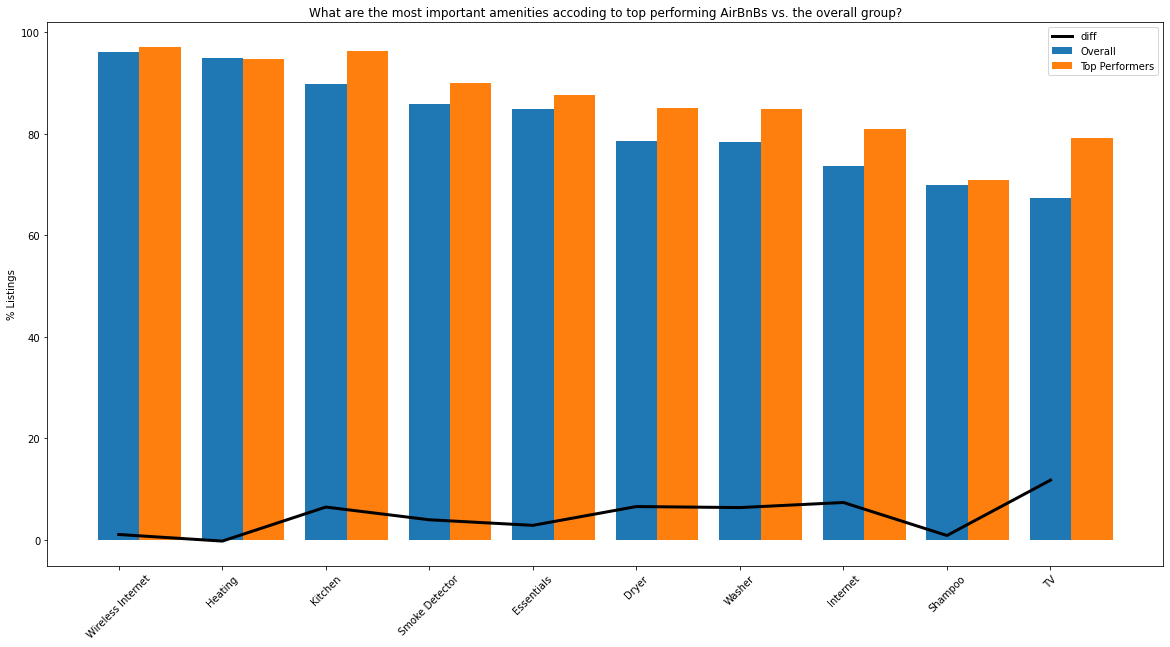

In [18]:
# Plot
plot_comparison(df_combined, 'amenities', 'perc_x', 'perc_y', 10, 'Overall', 'Top Performers', 'diff', 
                'What are the most important amenities accoding to top performing AirBnBs vs. the overall group?')

There isn't much difference in what the overall group vs. top performers think of as the 10 most important amenities. As long as most of these basic amenities are catered for, your AirBnB should attract customers. 

Over 95% of all listings have **wireless internet** and **heating** - these are non-negotiable to list your place on the market. If you want to be a top performer you should probably invest in a good **kitchen**. 
The top performers also are more likely to have a **TV** compared to the overall group. 

But these are the basis. What if you want to stand out. What are the potential opportunities for differentiation? What really separates the top performers from the overall group?

In [19]:
#Sort amenities in order where there is the biggest difference for top performers compared to overall group
df_differentiators = df_combined.sort_values('diff', ascending=False).head(10)
df_differentiators

,Importance_All,amenities,count_x,perc_x,Importance_Top,count_y,perc_y,diff
13,13,Family/Kid Friendly,1963,51.4,11,486,63.6,12.2
9,9,TV,2574,67.4,8,605,79.2,11.8
19,19,Elevator in Building,785,20.6,16,239,31.3,10.7
7,7,Internet,2811,73.6,7,619,81.0,7.4
10,10,Carbon Monoxide Detector,2485,65.1,9,552,72.3,7.2
29,29,Gym,442,11.6,25,141,18.5,6.9
5,5,Dryer,2997,78.5,5,650,85.1,6.6
2,2,Kitchen,3423,89.7,1,735,96.2,6.5
6,6,Washer,2992,78.4,6,648,84.8,6.4
23,23,Safety Card,727,19.0,18,192,25.1,6.1


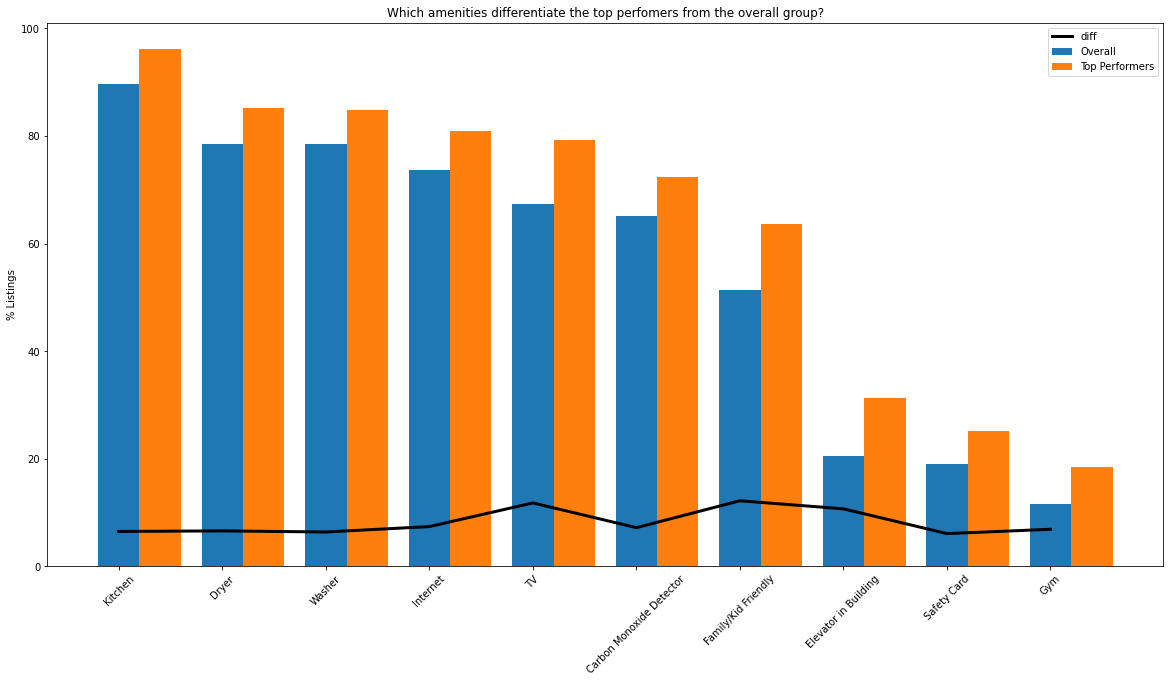

In [20]:
# Plot
plot_comparison(df_differentiators.sort_values('perc_y', ascending=False), 'amenities', 'perc_x', 'perc_y', 10, 'Overall', 'Top Performers', 'diff', 
                'Which amenities differentiate the top perfomers from the overall group?')


Looking at the black line (the difference between the orange and blue bars) we see that having a **family/Kid friendly** home is a lot more prevalent in top performing listings than the overall group. Having a good **TV and kitchen** has already been mentioned. Other possible differentiators include **Gym** and **Washer and dryer facilities**